# Lab Session #6.1
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Fotios Drakopoulos, Jorne Laton, Lloyd Plumart, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs:</font> César Zapata - 02213600
<br>
<font color=blue>Academic Year:</font> 2022-2023

# Unsupervised and supervised learning

This exercise is adapted from the examples provided in the textbook "Neuronal Dynamics" by Gerstner, Kistler, Naud, Paninski (2014, Cambridge University Press) and the 2020 Neuron publication "Artificial Neural Networks for Neuroscientists: A Primer" publication by GR Yang and X-J Wang. Code adapted into exercise by Fotios Drakopoulos and Sarah Verhulst, UGent, 2021.

## Supervised learning: Oja's rule in Hebbian Learning <a id="introduction"></a>

The figure below shows the configuration of a neuron learning from the joint input of two presynaptic neurons. 

<img src='Oja_setup.png' width="400" height="400">

In this first part of the exercise, you will evaluate how the behavior of the pre-synaptic inputs and learning rate affect the weight optimisation under Oja's learning rule. The below code executes and plots the synaptic weights and post-synaptic firing rates given a cloud of presynaptic firing rates. You can modify the learning rate *eta* as well as the relationship between the pre-synaptic data by changing the *ratio* parameter. 

The final weight vector w is: (0.4714866256401233,0.8825058387139199)


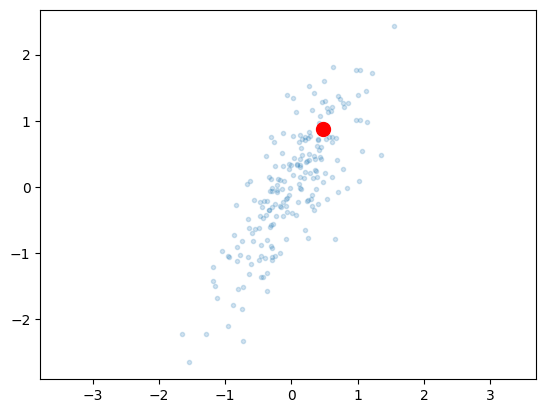

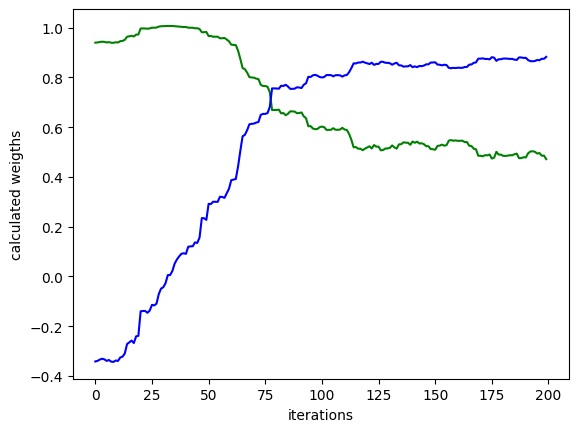

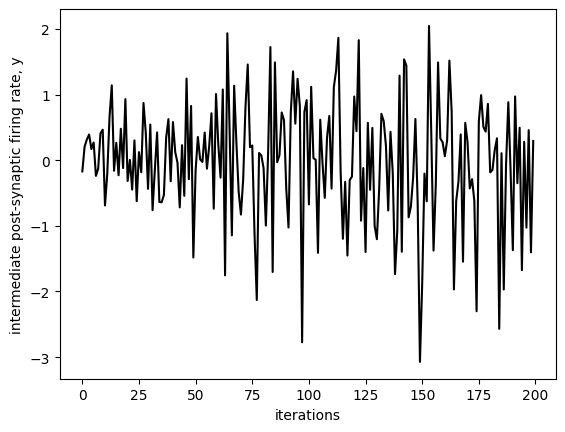

In [1]:
%matplotlib inline  
import oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.04)

# plotting 
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
plt.xlabel("iterations")
plt.ylabel("calculated weigths")
plt.figure()
plt.plot(out[:, 0], "k")
plt.xlabel("iterations")
plt.ylabel("intermediate post-synaptic firing rate, y")

print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

### Q1: Oja learning <a id="Q1"></a>

Run the above code and get a feeling for what the function and figures do. You can think of each of the two columns of the cloud as the time series of firing rates of the presynaptic neurons $\nu_1$ and $\nu_2$.

- Change the learning rate eta from the original value to a much larger value 0.2, qualitatively describe the effect of this change on the weight optimisation

The original data-cloud of pre-synaptic firing rates showed correlations between the firing rates. For the next simulation, you will simulate how study Oja’s rule works on a data set which has no correlations. 

- You can modify the *ratio* parameter in the make_cloud funtion and set it to 1 to simulate circular data-sets (i.e. no correlations between the pre-synaptic firing rates). Evaluate the time course of the weight vectors when ratio is set to 1, and repeat the simulations many times (e.g. 100) to evaluate what Oja's rule is doing for this type of data. Each time you call the *learn* function, it will choose a new set of random initial conditions. Can you explain what happens to the final weight estimate and the time-course of the weights?

- Now do this for different learning rates eta, and qualitatively describe the effects

- Lastly, return to a cloud ratio of 0.3, and repeat the simulations e.g. 100 times. What is the difference in learning do you observe between the 0.3 and 1 ratio conditions for a learning rate eta of 0.04?

* [Fill in answer here](#A1)

### Q2: Oja final weights <a id="Q2"></a>

If we assume a linear firing rate model, we can write $\nu^{post}=\sum_{j}w_{j}\nu_{j}^{pre}=w \cdot \nu^{pre}$, where the dot denotes a scalar product, and hence the output rate $\nu^{post}$ (or $y$) can be interpreted as a projection of the input vector onto the weight vector. 

- After learning (e.g. ratio 0.3 and eta 0.04), what does the output y tell about the input? Can you see a resemblance between Oja's learning rule and a principle component analysis?

- Take the final weights [w31, w32], then calculate a single input vector (v1=?, v2=?) that leads to a maximal output firing y. You can perform this procedure by first constraining your input to norm([v1,v2]) =1 to write v2 as a function of v1. Then simulate $y$ for v1 in range between -1 and +1 to graphically determine the maximal firing rate (no need to compute the derivative). 

- Perform the same procedure, but now calculate the input vector which leads to a minimal output firing y.

The above exercises assume that the input activities can be negative (indeed the inputs were always statistically centered). In actual neurons, if we think of their activity as their firing rate, this cannot be less than zero.

- Repeat the simulations from this block, but by applying the learning rule on a noncentered data cloud. E.g., use cloud = (3,5) + oja.make_cloud(n=1000, ratio=.4, angle=-45), which centers the data around (3,5). What conclusions can you draw? Can you think of a modification to the learning rule?

* [Fill in answer here](#A2)

## Answers
#### A1: Oja Learning  <a id="A1"></a>
* [Go back to Q1](#Q1) 

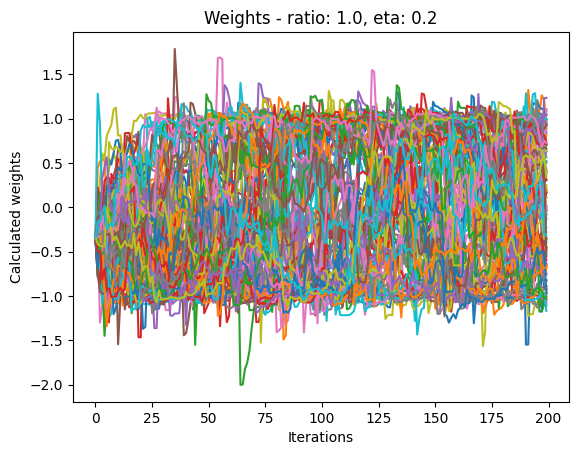

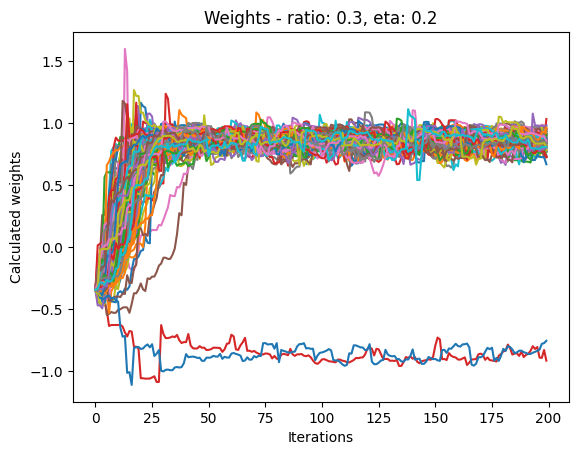

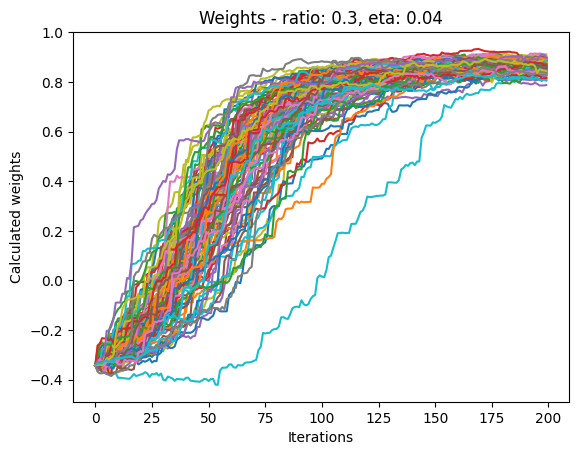

In [3]:
# function to visualize 
def see_network_iter(iterations, n, ratio, eta):

    weights_arr = np.zeros((iterations, n, 2)) # 100 iterations, 200 neur

    for i in range(iterations):
        cloud = oja.make_cloud(n=n, ratio=ratio, angle=60)
        wcourse, out = oja.learn(cloud, initial_angle=-20, eta=eta)

        weights_arr[i, :] = wcourse
        plt.plot(wcourse[:, 1]) # final weight estimate
    
    plt.title(f"Weights - ratio: {ratio}, eta: {eta}")
    plt.ylabel("Calculated weights")
    plt.xlabel("Iterations")
    plt.show()
    
    return weights_arr


no_correlation = see_network_iter(100, 200, 1.0, 0.2) # changing ration from 0.3 to 1 -> no correlation, circular dataset
correl = see_network_iter(100, 200, 0.3, 0.2)
eta_005 = see_network_iter(100, 200, 0.3, 0.04)

<div class="alert alert-success">
<span style="color:black">

**Q1.1 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

In [3]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q1.2 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

In [4]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q1.3 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

In [5]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q1.4 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

#### A2: Oja final weights  <a id="A2"></a>
* [Go back to Q2](#Q2) 

In [6]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q2.1 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

In [7]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q2.2 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

In [8]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q2.3 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

In [9]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q2.4 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>